# Regressão linear 2:  gradiente descendente


### Aprendizado e otimização

Dada uma função *target* desconhecida $f:\mathbb{R}^{d} \rightarrow \mathbb{R}$ e uma hipótese $h_{\mathbf{w}}:\mathbb{R}^{d} \rightarrow \mathbb{R}$ o erro de $h_{\mathbf{w}}$ é definido por:

\begin{equation}
E_{out}(h_{\mathbf{w}}) = \mathbb{E}_{\mathbf{x}\sim p_{data}}L(h(\mathbf{x}; \mathbf{w}), \; f(\mathbf{x}))
\end{equation}

em que $p_{data}$ é a distribuição geradora dos dados, $L$  é alguma função de perda (por exemplo, o quadrado da diferença) e $h(\mathbf{x}; \mathbf{w}) = h_{\mathbf{w}}(\mathbf{x})$. Se tivéssemos acesso a $p_{data}$ poderíamos calcular a função acima para qualquer $h_{\mathbf{w}}$ e escolher aquele com erro mínimo.

Como não temos acesso a $p_{data}$, define-se

\begin{equation}
E_{in}(h_{\mathbf{w}}) = J(\mathbf{w}) = \frac{1}{N}\sum_{i=1}^{N} L(h(\mathbf{x}_{i}; \mathbf{w}), \; y_{i})
\end{equation}

em que $N$ é o tamanho do dataset de treinamento e $y_{i} = f(\mathbf{x}_{i})$.

Como visto em aula, uma relação entre $E_{in}$ e $E_{out}$ pode ser estabelecida pela **Inequação de Hoeffding**.

Aqui estamos interessados em encontrar $h_{\mathbf{w}}$ com erro $J(\mathbf{w})$ mínimo. Isto corresponde a determinar o ponto mínimo da função $J(\mathbf{w})$. Por isso, vamos nos concentrar apenas em uma técnica de otimização para minimizar $E_{in}$.


### Gradiente ascendente e gradiente descendente

Dados $\mathbf{w}, \mathbf{u} \in \mathbb{R}^{d}$ e $J:\mathbb{R}^{d} \rightarrow \mathbb{R}$ tal que $||\mathbf{u}||_{2} = 1$ a taxa de variação de $J$ no ponto $\mathbf{w}$ em direção a $\mathbf{u}$ é chamada de **derivada direcional**, $D_{\mathbf{u}}J(\mathbf{w})$. Definindo $g(h) = J(\mathbf{w} + h\mathbf{u})$, podemos usar a regra da cadeia e a definição de produto escalar para mostrar que  

\begin{equation}
D_{\mathbf{u}}J(\mathbf{w}) \;\;=\;\; \left. \frac{dg}{dh} \right|_{h=0} \;\;=\;\; \mathbf{u}^{T}\nabla_{\mathbf{w}}J(\mathbf{w})
    \;\;=\;\; ||\mathbf{u}||_{2}||\nabla_{\mathbf{w}}J(\mathbf{w})||_{2}cos\theta \;\;=\;\; ||\nabla_{\mathbf{w}}J(\mathbf{w})||_{2}cos\theta
\end{equation}

em que $\theta$ é o ângulo entre $\mathbf{u}$ e $\nabla_{\mathbf{w}}J(\mathbf{w})$. Assim, pensando em $D_{\mathbf{u}}J(\mathbf{w})$ em termos do vetor $\mathbf{u}$ temos que: $D_{\mathbf{u}}J(\mathbf{w})$ tem o valor máximo quando $\mathbf{u}$ tem a mesma direção que $\nabla_{\mathbf{w}}J(\mathbf{w})$ ($\theta=0$); similarmente $D_{\mathbf{u}}J(\mathbf{w})$ tem o valor mínimo quando $\mathbf{u}$ tem a direção oposta a $\nabla_{\mathbf{w}}J(\mathbf{w})$ ($\theta=\pi$).

Desse modo podemos maximizar $J$ alterando $\mathbf{w}$ na direção de $\nabla_{\mathbf{w}}J(\mathbf{w})$ e podemos minimizar $J$ alterando $\mathbf{w}$ na direção de $-\nabla_{\mathbf{w}}J(\mathbf{w})$. Isso permite dois métodos bem simples de otimização:

**Gradiente Ascendente**

- $\mathbf{w}(0) = \mathbf{w}$
- for $t = 0, 1, 2, \dots$ do
    * $\mathbf{w}(t+1) = \mathbf{w}(t) + \eta \nabla_{\mathbf{w}(t)}J(\mathbf{w}(t))$ 

    

**Gradiente Descendente**

- $\mathbf{w}(0) = \mathbf{w}$
- for $t = 0, 1, 2, \dots$ do
    * $\mathbf{w}(t+1) = \mathbf{w}(t) - \eta \nabla_{\mathbf{w}(t)}J(\mathbf{w}(t))$ 

Em ambos os casos o parâmetro $\eta \in \mathbb{R}_{\geq}$ é chamado de **taxa de aprendizado** (*learning rate*); ele pondera o tamanho de cada atualização.

#####   A seguir são apresentados uma sequência de exercícios que ilustram diferentes aspectos práticos na implementação do algoritmo *gradient descent*  
Iremos considerar o problema de regressão linear.

In [109]:
# all imports
import numpy as np
import time
from util import r_squared, randomize_in_place, get_housing_prices_data
from plots import simple_step_plot, plot_points_regression, plot_cost_function_curve

%matplotlib inline

#####  Vamos usar o mesmo dataset de antes, mas agora vamos dividir os dados em treinamento, validação e teste.
Essa divisão é comumente realizada na prática: os dados de treinamento são usados na otimização da função custo $J$, os dados de validação são usados para aferir a qualidade da otimização, e os dados de teste são usados para aferir a qualidade da predição.

In [110]:
X, y = get_housing_prices_data(N=350, verbose=False)
randomize_in_place(X, y)

train_X = X[0:250]
train_y = y[0:250]
valid_X = X[250:300]
valid_y = y[250:300]
test_X = X[300:]
test_y = y[300:]

print("\nDividindo os dados em treinamento, validação e teste")
print("\ntrain_X shape = {}".format(train_X.shape))
print("\ntrain_y shape = {}".format(train_y.shape))
print("\nvalid_X shape = {}".format(valid_X.shape))
print("\nvalid_y shape = {}".format(valid_y.shape))
print("\ntest_X shape = {}".format(test_X.shape))
print("\ntest_y shape = {}".format(test_y.shape))


Dividindo os dados em treinamento, validação e teste

train_X shape = (250, 1)

train_y shape = (250, 1)

valid_X shape = (50, 1)

valid_y shape = (50, 1)

test_X shape = (50, 1)

test_y shape = (50, 1)


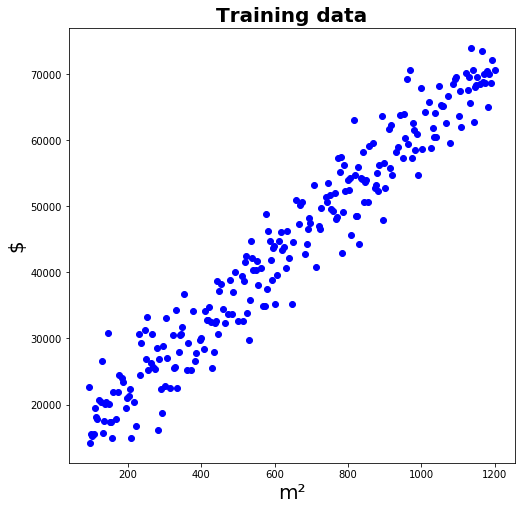

In [111]:
plot_points_regression(train_X,
                       train_y,
                       title='Training data',
                       xlabel="m\u00b2",
                       ylabel='$')

### Para minimizar a função de custo vamos ter que colocar os dados em uma outra escala

Um modo de fazer isso é o chamado [standard/z score](https://en.wikipedia.org/wiki/Standard_score).
Aplicamos a seguinte transformação: 

\begin{equation}
\mathbf{X}^{\top}_{i} \leftarrow \frac{\mathbf{X}^{\top}_{i} - \mu_{i}}{\sigma_{i}}
\end{equation}

em que $\mathbf{X}^{T}_{i} \in \mathbb{R}^{N}$ ($i = 1, \dots, d$) é um vetor de features da design matrix $\mathbf{X}$, $\mu_{i}$ é a média de tal vetor, e $\sigma_{i}$ seu desvio padrão.

A importância de se fazer essa transformação é discutida mais ao final deste notebook.

#####  **Exercício 1)** 
Use a biblioteca numpy para implementar a função que altera os dados conforme a equação acima (essa função deve funcionar para uma design matrix $\mathbf{X}$ com um número arbitrário de features).

In [112]:
def standardize(X):
    """
    Returns standardized version of the ndarray 'X'.

    :param X: input array
    :type X: np.ndarray(shape=(N, d))
    :return: standardized array
    :rtype: np.ndarray(shape=(N, d))
    """

    # YOUR CODE HERE:
    mean = X.mean(axis=0)
    std_dev = X.std(axis=0)
    X_out = (X-mean)/std_dev
    # END YOUR CODE

    return X_out

**Teste exercício 1)**

In [113]:
try:
    toy_X = np.array([[1100.3, 2.4, 34.34],
                      [2300.3, 1.4, 442.23]])
    toy_y = np.array([[1000.2], [2000.5]])
    toy_X_norm = standardize(toy_X)
    toy_y_norm = standardize(toy_y)
    xmean, xstd = np.mean(toy_X_norm), np.std(toy_X_norm)
    ymean, ystd = np.mean(toy_y_norm), np.std(toy_y_norm)
    assert -1 <= xmean < 0
    assert 0 <= ymean < 1
    assert 0.9 <= xstd <= 1
    assert 0.9 <= ystd <= 1

except NotImplementedError:
    print("Falta fazer!")

Dados originais

X:
mean 636.5652465820312, std 323.76, max 1200.0, min 93.1805191040039

y:
mean 43809.703125, std 16474.35, max 74024.828125, min 14171.33984375

Dados normalizados

X:
mean 7.915496524901755e-08, std 1.00, max 1.740271806716919, min -1.6783435344696045

y:
mean -8.296966313992016e-08, std 1.00, max 1.8340706825256348, min -1.7990609407424927



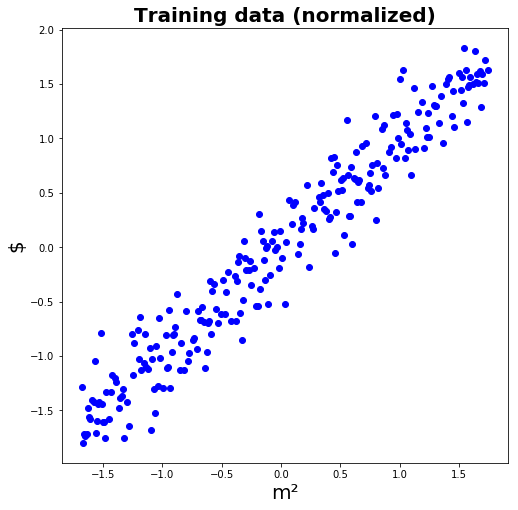

In [114]:
try:
    train_X_norm = standardize(train_X)
    train_y_norm = standardize(train_y)


    xmean, xstd = np.mean(train_X), np.std(train_X)
    xmax, xmin = np.max(train_X), np.min(train_X)
    ymean, ystd = np.mean(train_y), np.std(train_y)
    ymax, ymin = np.max(train_y), np.min(train_y)

    print("Dados originais\n")
    print("X:\nmean {}, std {:.2f}, max {}, min {}".format(xmean,
                                                           xstd,
                                                           xmax,
                                                           xmin))
    print("\ny:\nmean {}, std {:.2f}, max {}, min {}\n".format(ymean,
                                                             ystd,
                                                             ymax,
                                                             ymin))


    xmean, xstd = np.mean(train_X_norm), np.std(train_X_norm)
    xmax, xmin = np.max(train_X_norm), np.min(train_X_norm)
    ymean, ystd = np.mean(train_y_norm), np.std(train_y_norm)
    ymax, ymin = np.max(train_y_norm), np.min(train_y_norm)

    print("Dados normalizados\n")
    print("X:\nmean {}, std {:.2f}, max {}, min {}".format(xmean,
                                                           xstd,
                                                           xmax,
                                                           xmin))
    print("\ny:\nmean {}, std {:.2f}, max {}, min {}\n".format(ymean,
                                                             ystd,
                                                             ymax,
                                                             ymin))
    plot_points_regression(train_X_norm,
                           train_y_norm,
                           title='Training data (normalized)',
                           xlabel="m\u00b2",
                           ylabel='$')

except NotImplementedError:
    print("Falta fazer!")

#####  Adicionando uma componente com apenas 1s como uma nova feature
Conforme já vimos, adicionar uma componente (coordenada artificial) constante 1 é conveniente. Isto é, em vez de $\mathbf{x} \in \mathbb{R}^d$ é conveniente considerarmos $(1,\mathbf{x}) \in \mathbb{R}^{d+1}$.

In [115]:
def add_feature_ones(X):
    """
    Returns the ndarray 'X' with the extra
    feature column containing only 1s.

    :param X: input array
    :type X: np.ndarray(shape=(N, d))
    :return: output array
    :rtype: np.ndarray(shape=(N, d+1))
    """
    return np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

try:
    train_X_1 = add_feature_ones(train_X_norm)
    print("\ntrain_X shape = {}".format(train_X_1.shape))

except NameError:
    print("Falta fazer!")


train_X shape = (250, 2)


#####  Criando a predição da regressão linear e plotando uma predição arbitrária

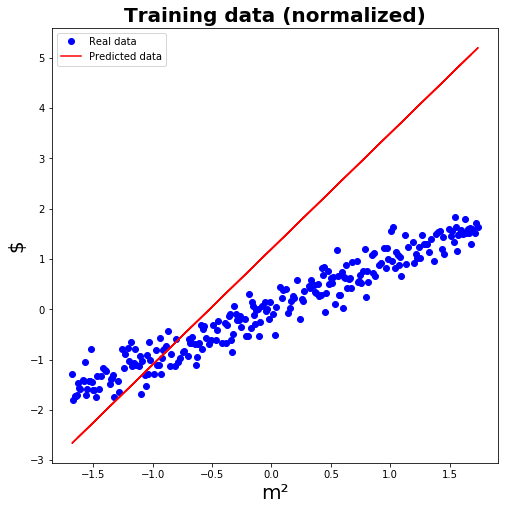

In [116]:
def linear_regression_prediction(X, w):
    """
    Calculates the linear regression prediction.

    :param X: design matrix
    :type X: np.ndarray(shape=(N, d))
    :param w: weights
    :type w: np.array(shape=(d, 1))
    :return: prediction
    :rtype: np.array(shape=(N, 1))
    """

    return X.dot(w)

try:
    w = np.array([[1.2], [2.3]])
    prediction = linear_regression_prediction(train_X_1, w)

    plot_points_regression(train_X_norm,
                           train_y_norm,
                           title='Training data (normalized)',
                           xlabel="m\u00b2",
                           ylabel='$',
                           prediction=prediction,
                           legend=True)
except NameError:
    print("Falta fazer!")

### Computando a função de custo

Usando o erro quadrárico médio, a função de custo $J(\mathbf{w})$ para a tarefa de regressão linear pode ser escrita de dois modos. A forma iterativa:

\begin{equation}
J(\mathbf{w}) = \frac{1}{N}\sum_{i=1}^{N}(\hat{y}_{i} - y_{i})^{2}
\end{equation}

e a forma vetorial:

\begin{equation}
J(\mathbf{w}) = \frac{1}{N}(\mathbf{X}\mathbf{w} - \mathbf{y})^{T}(\mathbf{X}\mathbf{w} - \mathbf{y})
\end{equation}



#####  **Exercício 2)**  
Use a biblioteca numpy para implementar a função de custo.

In [117]:
# teste
# w = np.array([[1], [1], [2]])
# X = np.array([[2, 3, 1],
#                   [5, 1, 2]])
# y = np.array([[1], [1]])

# print(w.shape)
# print(X.shape)
# print(y.shape)

# N = X.shape[0]
# J = ((X.dot(w) - y).T).dot(X.dot(w) - y) / N
# J[0][0]

In [118]:
def compute_cost(X, y, w):
    """
    Calculates  mean square error cost.

    :param X: design matrix
    :type X: np.ndarray(shape=(N, d))
    :param y: regression targets
    :type y: np.ndarray(shape=(N, 1))
    :param w: weights
    :type w: np.array(shape=(d, 1))
    :return: cost
    :rtype: float
    """

    # YOUR CODE HERE:
    N = X.shape[0]
    J = ((X.dot(w) - y).T).dot(X.dot(w) - y) / N
    J = J[0][0]
    # END YOUR CODE

    return J

**Teste exercício 2)**

In [119]:
try:
    toy_w = np.array([[1], [1], [2]])
    toy_X = np.array([[2, 3, 1],
                      [5, 1, 2]])
    toy_y = np.array([[1], [1]])
    assert compute_cost(toy_X, toy_y, toy_w) == 58.5
except NotImplementedError:
    print("Falta fazer!")

Podemos olhar a superficie de custo e ver onde se situa um valor $J(\mathbf{w})$.

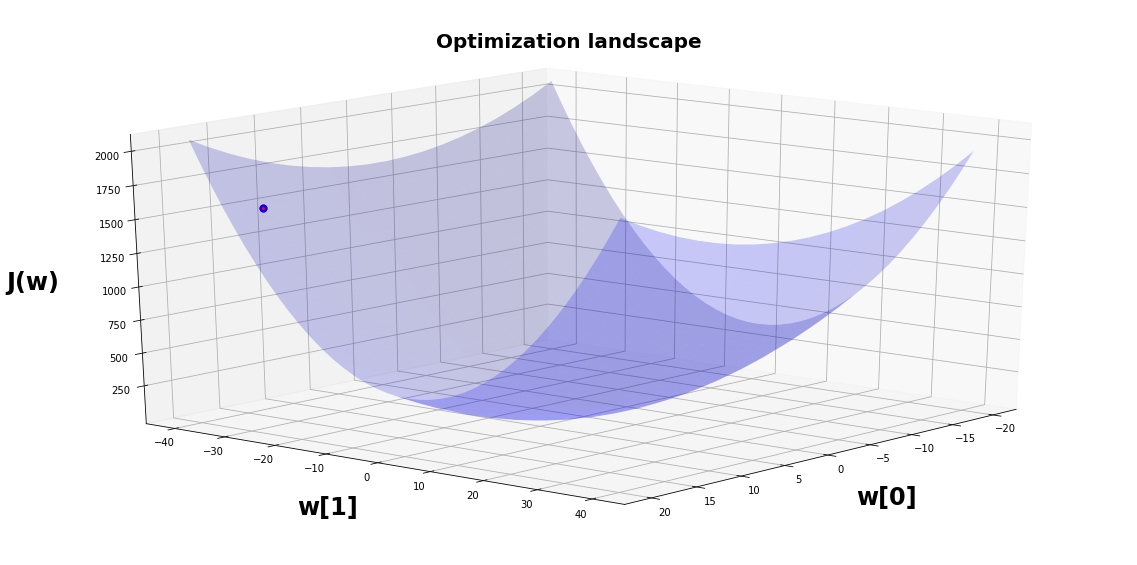

In [120]:
try:    
    initial_w = np.array([[15], [-35.3]])
    initial_J = compute_cost(train_X_1, train_y_norm, initial_w)

    plot_cost_function_curve(train_X_1,
                             train_y_norm,
                             compute_cost,
                             title="Optimization landscape",
                             weights_list=[initial_w.flatten()],
                             cost_list=[initial_J])
except (NotImplementedError, NameError):
    print("Falta fazer!")

### Calculando os gradientes

É fácil calcular a derivada parcial de $J(\mathbf{w})$ com relação a cada entrada $j$ de $\mathbf{w}$:

\begin{equation}
\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}_{j}} = \frac{2}{N}\sum_{i=1}^{N} (\hat{y}_i - y_i) \mathbf{x}_{ij}
\end{equation}

Lembre que o gradiente de $J(\mathbf{w})$ com relação a $\mathbf{w}$ é:

\begin{equation}
\nabla_{\mathbf{w}}J(\mathbf{w}) = \begin{bmatrix}\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}_{1}} \dots \frac{\partial J(\mathbf{w})}{\partial \mathbf{w}_{m}} \end{bmatrix}
\end{equation}

#####  **Exercício 3)**  
Use a biblioteca numpy para calcular $\nabla_{\mathbf{w}}J(\mathbf{w})$.

In [121]:
# w = toy_w1 = np.array([[1.], [2.], [1.], [2.]])
# X = toy_X1 = np.array([[2., 3., 1., 2.],
#                   [5., 1., 1., 2.]])
# y = toy_y1 = np.array([[1.], [-1.]])

# print((X.dot(w) - y).shape)
# print(X.shape)
# print(X.shape[0])
# print((X.dot(w) - y))
# print(X)
# N = X.shape[0]
# grad =((X.dot(w) - y).T.dot(X))*2/N
# grad[0]

In [122]:
def compute_wgrad(X, y, w):
    """
    Calculates gradient of J(w) with respect to w.

    :param X: design matrix
    :type X: np.ndarray(shape=(N, d))
    :param y: regression targets
    :type y: np.ndarray(shape=(N, 1))
    :param w: weights
    :type w: np.array(shape=(d, 1))
    :return: gradient
    :rtype: np.array(shape=(d, 1))
    """

    # YOUR CODE HERE:
    N = X.shape[0]
    grad = ((X.dot(w) - y).T.dot(X))*2/N
    grad = grad[0]
    # END YOUR CODE

    return grad

**Teste exercício 3)**

In [123]:
def grad_check(X, y, w, h=1e-4):
    """
    Check gradients for linear regression.

    :param X: design matrix
    :type X: np.ndarray(shape=(N, d))
    :param y: regression targets
    :type y: np.ndarray(shape=(N, 1))
    :param w: weights
    :type w: np.array(shape=(d, 1))
    :param h: small variation
    :type h: float
    :return: gradient test
    :rtype: boolean
    """
    Jw = compute_cost(X, y, w)
    grad = compute_wgrad(X, y, w)
    passing = True
    d = w.shape[0]
    for i in range(d):
        w_plus_h = np.array(w, copy=True)
        w_plus_h[i] = w_plus_h[i] + h
        Jw_plus_h = compute_cost(X, y, w_plus_h)
        w_minus_h = np.array(w, copy=True)
        w_minus_h[i] = w_minus_h[i] - h
        Jw_minus_h = compute_cost(X, y, w_minus_h)
        numgrad_i = (Jw_plus_h - Jw_minus_h) / (2 * h)
        reldiff = abs(numgrad_i - grad[i]) / max(1, abs(numgrad_i), abs(grad[i]))
        if reldiff > 1e-5:
            passing = False
            msg = """
            Seu gradiente = {0}
            Gradiente numérico = {1}""".format(grad[i], numgrad_i)
            print("            " + str(i) + ": " + msg)
            print("            Jw = {}".format(Jw))
            print("            Jw_plus_h = {}".format(Jw_plus_h))
            print("            Jw_minus_h = {}\n".format(Jw_minus_h))

    if passing:
        print("Gradiente passando!")
    
    return passing 

try:
    toy_w1 = np.array([[1.], [2.], [1.], [2.]])
    toy_X1 = np.array([[2., 3., 1., 2.],
                      [5., 1., 1., 2.]])
    toy_y1 = np.array([[1.], [-1.]])
    toy_w2 = np.array([[-100.22], [20002.1], [102.5]])
    toy_X2 = np.array([[2111.3, -2223., 404.0],
                      [5222., -22221., 3.3]])
    toy_y2 = np.array([[122.], [221.]])
    toy_w3 = np.array([[-10.22], [-3.1]])
    toy_X3 = np.array([[1.3, -1.2],
                      [2.2, -2.1],
                      [-2.3, -5.5],
                      [3.2, 8.1],
                      [3.3, -1.1],
                      [-3.4, -2.22],
                      [2.23, -4.4],
                      [5.2, -2.3]])
    toy_y3 = np.array([[10.3],
                       [23.3],
                       [10.1],
                       [-20.2],
                       [-10.2],
                       [20.2],
                       [-14.4],
                       [-30.3]])
    
    assert grad_check(toy_X1, toy_y1, toy_w1)
    assert grad_check(toy_X2, toy_y2, toy_w2)
    assert grad_check(toy_X3, toy_y3, toy_w3)

except NotImplementedError:
    print("Falta fazer!")

Gradiente passando!
Gradiente passando!
Gradiente passando!


### Batch gradient descent

A versão mais simples do algoritmo *gradient descent* faz uso de todas as observações do dataset de treinamento (esse algoritmo também é conhecido como *batch gradient descent* ou *vanilla gradient descent*).

**Batch gradient descent**

- $\mathbf{w}(0) = \mathbf{w}$
- for $t = 0, 1, 2, \dots$ do
    * Compute the gradient $\nabla_{\mathbf{w}(t)}J(\mathbf{w}(t))$ 
    * Apply update : $\mathbf{w}(t+1) = \mathbf{w}(t) - \eta \nabla_{\mathbf{w}(t)}J(\mathbf{w}(t))$


#####  **Exercício 4)** 
Implemente o algoritmo batch gradient descent com a taxa de apreendizado fixa para a regressão linear. A função abaixo deve retornar três coisas: o vetor de pesos $\mathbf{w}$, uma lista com cada peso obtido ao longo do treinamento, e uma lista com o custo de cada peso.

In [124]:
# i = 1

# X = train_X_1
# y = train_y_norm
# w = initial_w
# num_iters = 10
# learning_rate = 0.03


# weights_history = [w.flatten()]
# cost_history = [compute_cost(X, y, w)]

# grad = compute_wgrad(X, y, w)
# w = (weights_history[i-1] - (learning_rate * grad)).flatten()
# weights_history.append(w)
# print(weights_history)

# Jw =  compute_cost(X, y, weights_history[i])
# cost_history.append(Jw)
# print(cost_history)

# # print(learning_rate * grad)

In [125]:
def batch_gradient_descent(X, y, w, learning_rate, num_iters):
    """
     Performs batch gradient descent optimization.

    :param X: design matrix
    :type X: np.ndarray(shape=(N, d))
    :param y: regression targets
    :type y: np.ndarray(shape=(N, 1))
    :param w: weights
    :type w: np.array(shape=(d, 1))
    :param learning_rate: learning rate
    :type learning_rate: float
    :param num_iters: number of iterations
    :type num_iters: int
    :return: weights, weights history, cost history
    :rtype: np.array(shape=(d, 1)), list, list
    """
    
    weights_history = [w]
    cost_history = [compute_cost(X, y, w)]

    # YOUR CODE HERE:
    for i in range(1, num_iters):
        #compute grad
        grad = compute_wgrad(X, y, w)
        grad = grad.reshape((2,1))
        #apply weights
        w = w-(learning_rate*grad)
        weights_history.append(w)
        #compute cost
        Jw =  compute_cost(X, y, w)
        #save cost 
        cost_history.append(Jw)
        num_iters += 1
    # END YOUR CODE

    return w, weights_history, cost_history 

**Teste exercício 4)**

In [126]:
try:
    learning_rate = 0.8
    iterations = 20000
    init = time.time()
    w, weights_history, cost_history = batch_gradient_descent(train_X_1,
                                                              train_y_norm,
                                                              initial_w,
                                                              learning_rate,
                                                              iterations)
    assert cost_history[-1] < cost_history[0]
    assert type(w) == np.ndarray
    assert len(weights_history) == len(cost_history)
    init = time.time() - init
    print("Tempo de treinamento = {:.8f}(s)".format(init))
    print("Tem que ser em menos de 1 segundo ")
    
except (NotImplementedError, NameError):
    print("Falta fazer!")

Tempo de treinamento = 0.32062745(s)
Tem que ser em menos de 1 segundo 


#####  Agora podemos treinar o modelo

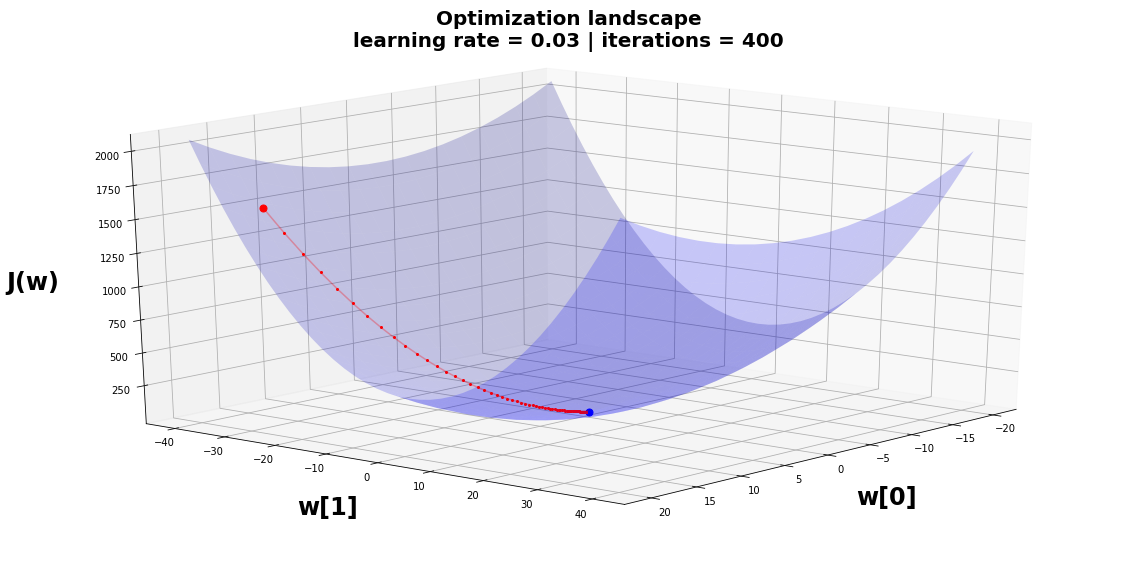

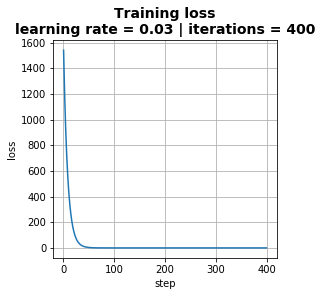

In [127]:
try:
    learning_rate = 0.03
    iterations = 400
    w, weights_history, cost_history = batch_gradient_descent(train_X_1,
                                                              train_y_norm,
                                                              initial_w,
                                                              learning_rate,
                                                              iterations)
    title = "Optimization landscape\nlearning rate = {} | iterations = {}".format(learning_rate,
                                                                                  iterations)
    plot_cost_function_curve(train_X_1,
                             train_y_norm,
                             compute_cost,
                             title=title,
                             weights_list=weights_history,
                             cost_list=cost_history)
    simple_step_plot([cost_history],
                 "loss",
                 'Training loss\nlearning rate = {} | iterations = {}'.format(learning_rate,
                                                                              iterations))
except (NotImplementedError, NameError):
    print("Falta fazer!")

### Hiper parâmetros (*hyperparameters*)


Hiper parâmetros são parâmetros que controlam o comportamento do algoritmo. Eles não são modificados pelo algoritmo de aprendizado. Escolhemos os hiper parâmetros de acordo com a performance deles no dataset de treinamento. Para evitar que o modelo decore o dataset de treinamento, pegamos uma parte desse dataset só para achar os melhores hiper parâmetros. Essa parte é chamada de **dataset de validação** (*validation set*).

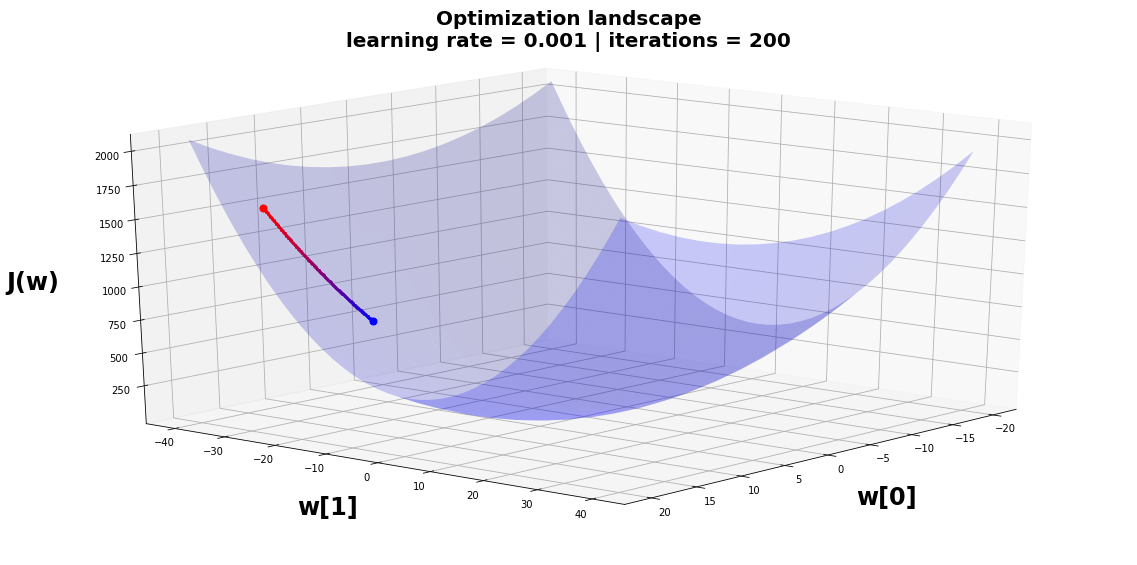

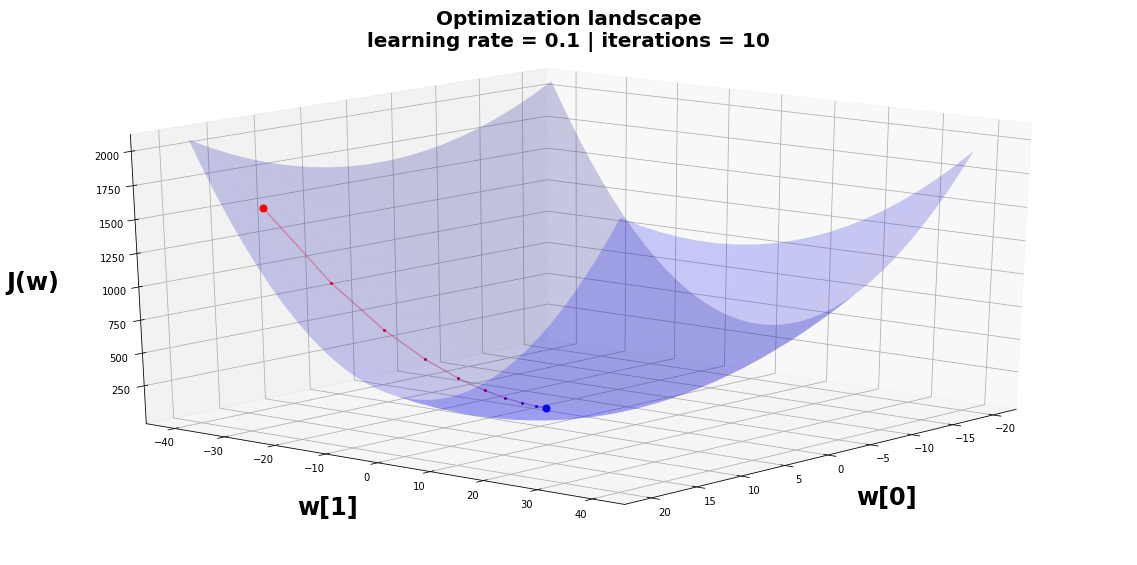

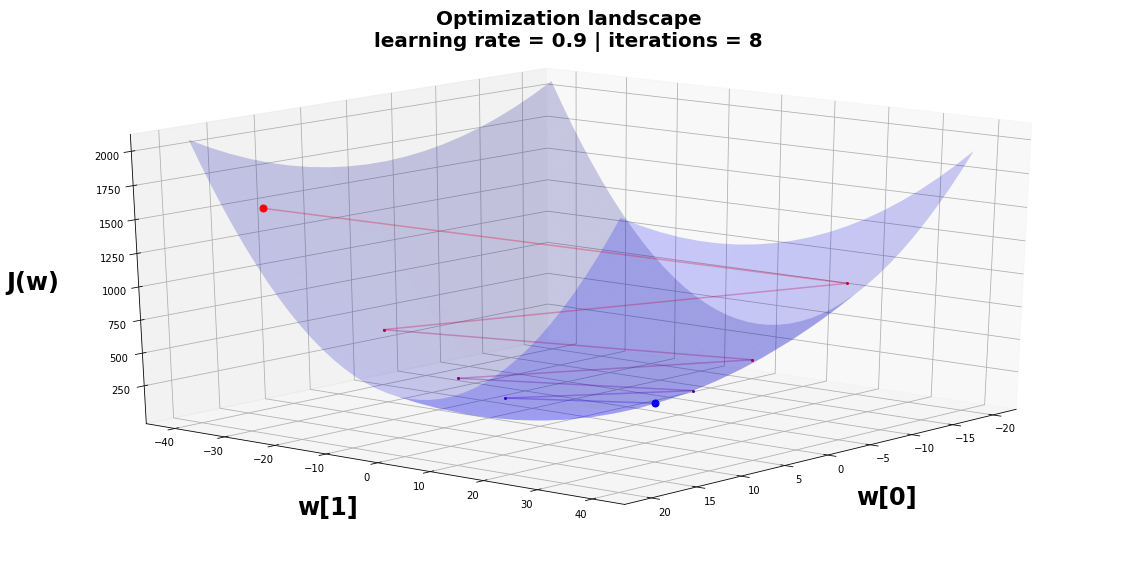

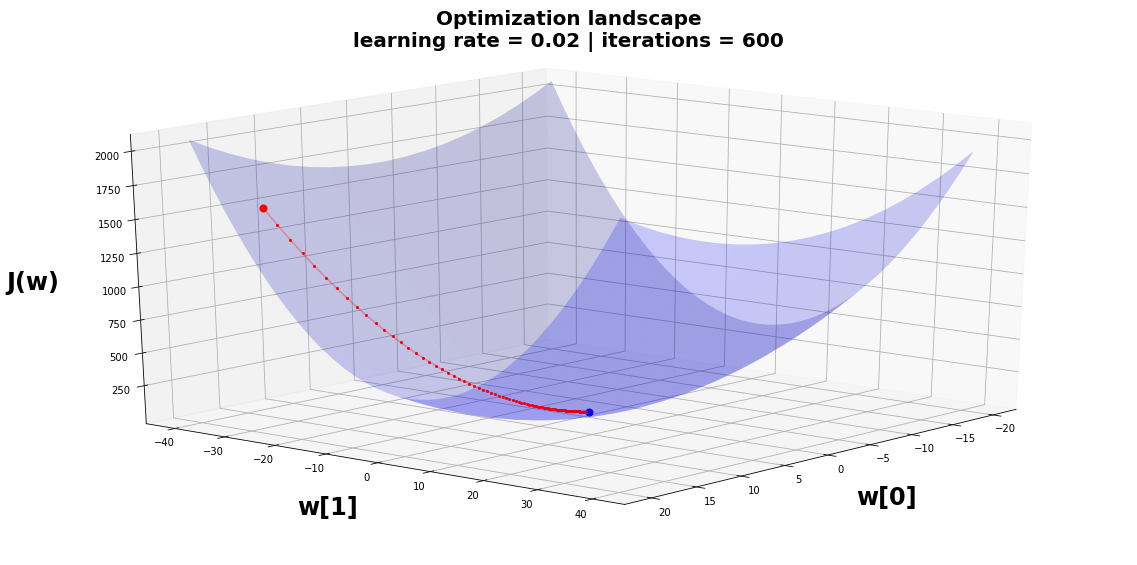

Best hyperparameters
learning rate = 0.02 | iterations = 600
w = [-1.60722441e-07  9.71713456e-01]
lowest validation set cost = 0.040083848275280165



In [128]:
try:
    valid_X_norm = standardize(valid_X)
    valid_y_norm = standardize(valid_y)
    valid_X_1 = add_feature_ones(valid_X_norm)

    hyper_params = [(0.001, 200),
                    (0.1, 10),
                    (0.9, 8),
                    (0.02, 600)]

    all_costs = []
    all_w = []

    for param in hyper_params:
        learning_rate = param[0]
        iterations = param[1]
        w, weights_history, cost_history = batch_gradient_descent(train_X_1,
                                                                  train_y_norm,
                                                                  initial_w,
                                                                  learning_rate,
                                                                  iterations)
        all_costs.append(compute_cost(valid_X_1, valid_y_norm, w))
        all_w.append(w)
        title = "Optimization landscape\n"
        title += "learning rate = {} | iterations = {}".format(learning_rate,
                                                               iterations)

        plot_cost_function_curve(train_X_1,
                                 train_y_norm,
                                 compute_cost,
                                 title=title,
                                 weights_list=weights_history,
                                 cost_list=cost_history)


    best_result_i = np.argmin(all_costs)
    best_w = all_w[best_result_i]
    lowest_cost = all_costs[best_result_i]
    best_params = hyper_params[best_result_i]

    result_str = "Best hyperparameters\n"
    result_str += "learning rate = {}".format(best_params[0])
    result_str += " | iterations = {}\n".format(best_params[1])
    result_str += "w = {}\n".format(best_w.flatten())
    result_str += "lowest validation set cost = {}\n".format(lowest_cost)

    print(result_str)

except (NotImplementedError, NameError):
    print("Falta fazer!")

##### Com o modelo treinado e escolhidos os melhores hiper parâmetros, podemos avaliá-lo sobre o dataset de teste.

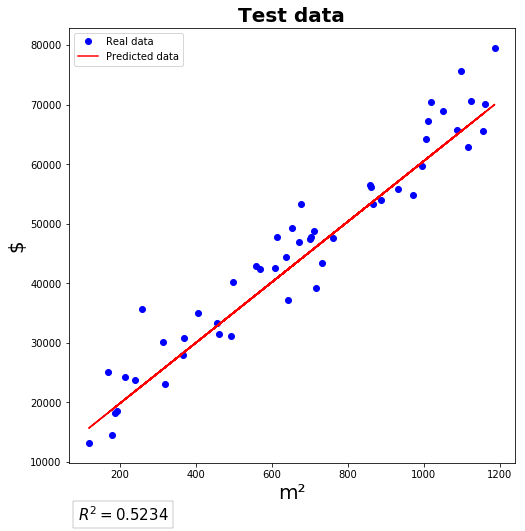

In [129]:
try:
    test_X_norm = standardize(test_X)
    test_y_norm = standardize(test_y)
    test_X_1 = add_feature_ones(test_X_norm)




    prediction = linear_regression_prediction(test_X_1, best_w)
    prediction = (prediction * np.std(train_y)) + np.mean(train_y)
    r_2 = r_squared(test_y, prediction)

    plot_points_regression(test_X,
                           test_y,
                           title='Test data',
                           xlabel="m\u00b2",
                           ylabel='$',
                           prediction=prediction,
                           r_squared=r_2,
                           legend=True)

except (NotImplementedError, NameError):
    print("Falta fazer!")

### Gradiente descendente estocástico

Nos casos em que $N$ é um número grande, computar $\nabla_{\mathbf{w}}J(\mathbf{w})$ a cada iteração se torna algo muito custoso. Uma estratégia para lidar com isso é **aproximar** $\nabla_{\mathbf{w}}J(\mathbf{w})$ usando o gradiente:

\begin{equation}
\hat{\nabla_{\mathbf{w}}J(\mathbf{w})} = \nabla_{\mathbf{w}}\frac{1}{m}\sum_{i=1}^{m} L(h(\mathbf{x}_{i}; \mathbf{w}), \; y_{i})
\end{equation}

em que $(\mathbf{x}_{1}, y_{1}), \dots ,(\mathbf{x}_{m}, y_{m})$ é uma amostragem aleatória dos dados de treinamento. A  estocasticidade surge da escolha desses $m$ dados (para que $\hat{\nabla_{\mathbf{w}}J(\mathbf{w})}$ seja um estimador não enviesado de $\nabla_{\mathbf{w}}J(\mathbf{w})$ nós amostramos os $m$ dados a cada iteração). Normalmente usamos o nome **gradiente descendente estocástico** (*stochastic gradient descent* ou *online gradient descent*) quando $m=1$, e usamos o nome **minibatch stochastic gradient descent** quando $1 < m <N$ (nesse caso estamos usando apenas um pequeno lote dos dados, um *minibatch*). Usamos *batch* para referir a um *minibatch*, não confunda isso com *batch gradient descent*.


**Stochastic gradient descent (SGD)**

- $\mathbf{w}(0) = \mathbf{w}$
- for $t = 0, 1, 2, \dots$ do
    * Sample a minibatch of $m$ examples from the training data.
    * Compute the gradient estimate $\hat{\nabla_{\mathbf{w}(t)}J(\mathbf{w}(t))}$
    * Apply update : $\mathbf{w}(t+1) = \mathbf{w}(t) - \eta \hat{\nabla_{\mathbf{w}(t)}J(\mathbf{w}(t))}$


#####  **Exercício 5)** 
Implemente o algoritmo stochastic gradient descent para a regressão linear com a taxa de apreendizado fixa. A saída da função é a mesma da função do exercício 4. 

In [130]:
X2 = np.append(X,X, axis=1)

In [131]:
X2[0]

array([109.08309, 109.08309], dtype=float32)

In [132]:
idx = np.random.choice(350, 10, replace=False)
X2[idx]

array([[ 382.60745,  382.60745],
       [ 535.2722 ,  535.2722 ],
       [1145.9313 , 1145.9313 ],
       [ 513.0086 ,  513.0086 ],
       [ 834.24066,  834.24066],
       [ 691.1175 ,  691.1175 ],
       [ 373.0659 ,  373.0659 ],
       [ 118.62464,  118.62464],
       [ 493.9255 ,  493.9255 ],
       [ 436.6762 ,  436.6762 ]], dtype=float32)

In [133]:
def stochastic_gradient_descent(X, y, w, learning_rate, num_iters, batch_size):
    """
     Performs stochastic gradient descent optimization

    :param X: design matrix
    :type X: np.ndarray(shape=(N, d))
    :param y: regression targets
    :type y: np.ndarray(shape=(N, 1))
    :param w: weights
    :type w: np.array(shape=(d, 1))
    :param learning_rate: learning rate
    :type learning_rate: float
    :param num_iters: number of iterations
    :type num_iters: int
    :param batch_size: size of the minibatch
    :type batch_size: int
    :return: weights, weights history, cost history
    :rtype: np.array(shape=(d, 1)), list, list
    """
    weights_history = [w]
    cost_history = [compute_cost(X, y, w)]
    
    # YOUR CODE HERE:
    for i in range(1, num_iters):
        idx = np.random.choice(X.shape[0], batch_size, replace=False)
        Xbatch = X[idx]
        ybatch = y[idx]
        #compute grad
        grad = compute_wgrad(Xbatch, ybatch, w)
        grad = grad.reshape((2,1))
        #apply weights
        w = w-(learning_rate*grad)
        weights_history.append(w)
        #compute cost
        Jw =  compute_cost(X, y, w)
        #save cost 
        cost_history.append(Jw)
        num_iters += 1
    # END YOUR CODE

    return w, weights_history, cost_history 

**Teste exercício 5)**

In [134]:
try:
    init = time.time()
    learning_rate = 0.8
    iterations = 2000
    batch_size = 36
    w, weights_history, cost_history = stochastic_gradient_descent(train_X_1,
                                                                   train_y_norm,
                                                                   initial_w,
                                                                   learning_rate,
                                                                   iterations,
                                                                   batch_size)
    assert cost_history[-1] < cost_history[0]
    assert type(w) == np.ndarray
    assert len(weights_history) == len(cost_history)
    init = time.time() - init
    print("Tempo de treinamento = {:.8f}(s)".format(init))
    print("Tem que ser em menos de 1.2 segundos")
    
except (NotImplementedError, NameError):
    print("Falta fazer!")

Tempo de treinamento = 0.11473227(s)
Tem que ser em menos de 1.2 segundos


###### Podemos experimentar com diferentes tamanhos de batch para ver que quanto maior o tamanho do batch (mais próximo de $N$) menor a variância.

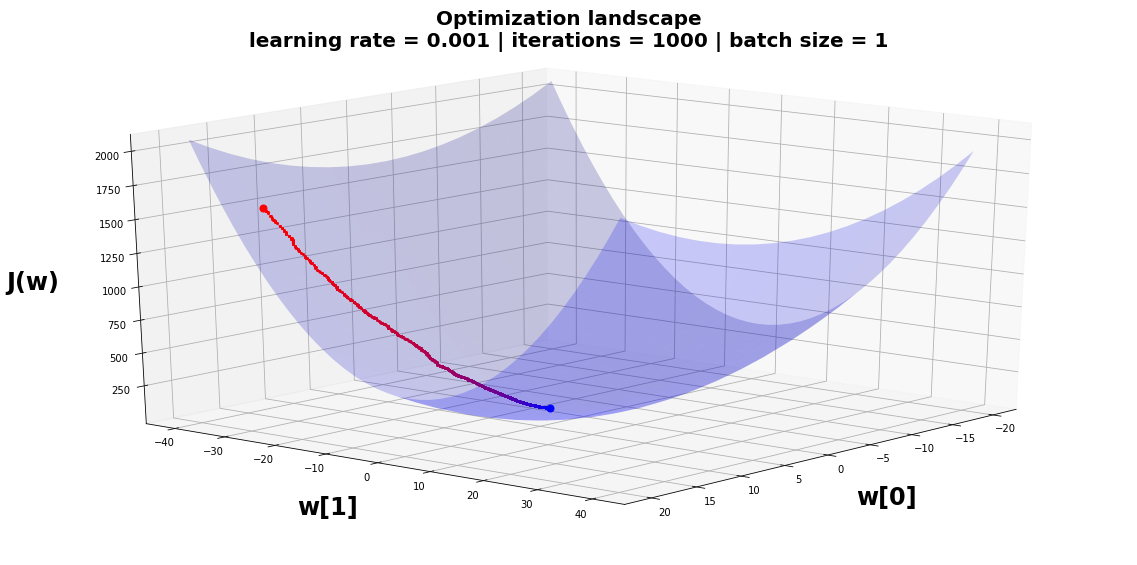

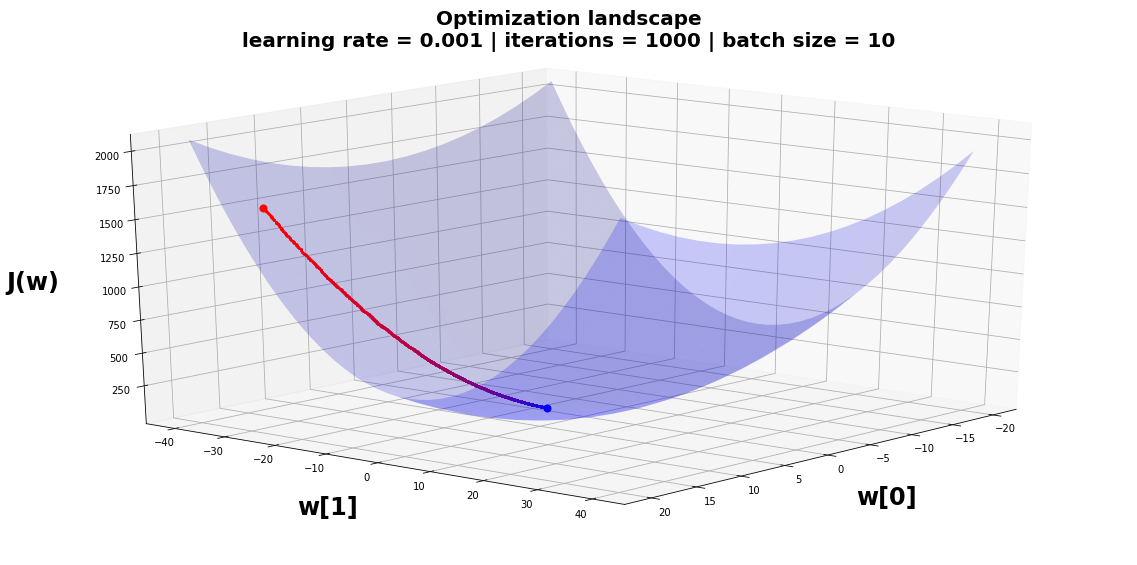

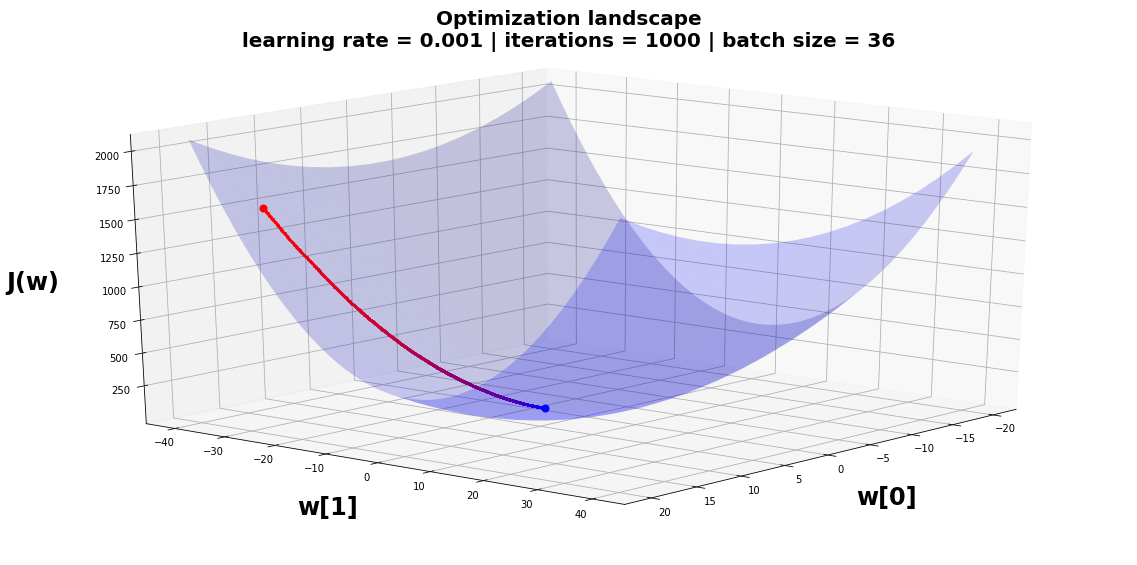

log
len all-costs: 4
len labels size: ['batch size = 1', 'batch size = 10', 'batch size = 36', 'batch size = 250']


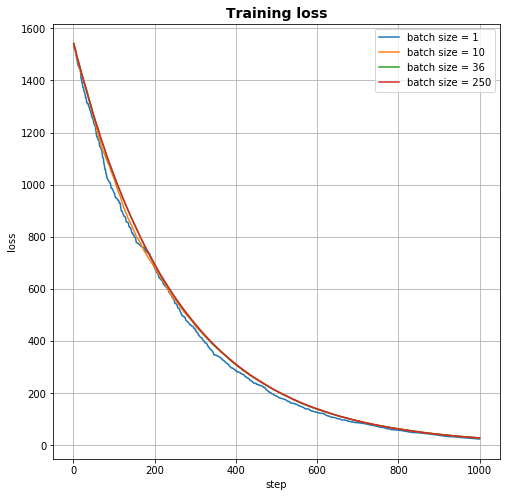

In [135]:
try:    
    hyper_params = [(0.001, 1000, 1),
                    (0.001, 1000, 10),
                    (0.001, 1000, 36)]
    all_costs = []

    for param in hyper_params:
        learning_rate = param[0]
        iterations = param[1]
        batch_size = param[2]
        _, weights_history, cost_history = stochastic_gradient_descent(train_X_1,
                                                                       train_y_norm,
                                                                       initial_w,
                                                                       learning_rate,
                                                                       iterations,
                                                                       batch_size)
        all_costs.append(cost_history)
        title = "Optimization landscape\n"
        title += "learning rate = {}".format(learning_rate)
        title += " | iterations = {}".format(iterations)
        title += " | batch size = {}".format(batch_size)
        plot_cost_function_curve(train_X_1,
                                 train_y_norm,
                                 compute_cost,
                                 title=title,
                                 weights_list=weights_history,
                                 cost_list=cost_history)




    _, _, cost_history_full = batch_gradient_descent(train_X_1,
                                                     train_y_norm,
                                                     initial_w,
                                                     learning_rate=0.001,
                                                     num_iters=1000)

    all_costs.append(cost_history_full)
    labels_size = ["batch size = " + str(param[2]) for param in hyper_params]
    labels_size += ["batch size = " + str(train_X_1.shape[0])]

    print("log")
    print("len all-costs: "+str(len(all_costs)))
    print("len labels size: "+str(labels_size))
    simple_step_plot(all_costs,
                     "loss",
                     'Training loss',
                      figsize=(8, 8),
                      labels=labels_size)


except (NotImplementedError, NameError):
    print("Falta fazer!")

### Por que normalizar?

O primeiro motivo para se normalizar os dados é para evitar *overflow*. Também é verdade que quando não normalizamos os dados as *features* podem apresentar diferentes escalas -- note que esse é o caso nesse dataset em que uma *feature* só tem $1$s e a outra ($m^{2}$) apresenta bastante variação. Isso influencia no gradiente de modo que a cada atualização os valores dos pesos vão mudar de modo diferente mesmo usando o mesmo *learning rate*.

Isso pode ser visto quando acompanhamos a mudança nos pesos ao longo do treinamento no dataset original e no normalizado. Note como o parâmetro $\mathbf{w}[1]$ (que pondera a feature ($m^{2}$)) muda bem mais que o parâmetro $\mathbf{w}[0]$ quando usamos o dataset não normalizado.

In [136]:
try:    
    _, weights_history_norm, cost_history_norm = batch_gradient_descent(train_X_1,
                                                                        train_y_norm,
                                                                        initial_w,
                                                                        learning_rate,
                                                                        10)

    train_X_1_non_norm = add_feature_ones(train_X)

    w, weights_history, cost_history = batch_gradient_descent(train_X_1_non_norm,
                                                              train_y,
                                                              initial_w,
                                                              0.000002,
                                                              10)




    w0_hist_norm = [w[0] for w in weights_history_norm]
    w1_hist_norm = [w[1] for w in weights_history_norm]


    w0mean, w0sdt, w0max, w0min = np.mean(w0_hist_norm), np.std(w0_hist_norm), np.max(w0_hist_norm), np.min(w0_hist_norm)
    w1mean, w1sdt, w1max, w1min = np.mean(w0_hist_norm), np.std(w1_hist_norm), np.max(w1_hist_norm), np.min(w1_hist_norm)

    print("\nVariação dos pesos com o dataset normalizado\n")
    print("w[0]:\nmean {}, std {:.2f}, max {}, min {}".format(w0mean, w0sdt, w0max, w0min))
    print("w[1]:\nmean {}, *std {:.2f}*, max {}, min {}".format(w1mean, w1sdt, w1max, w1min))              




    w0_hist = [w[0] for w in weights_history]
    w1_hist = [w[1] for w in weights_history]


    w0mean, w0sdt, w0max, w0min = np.mean(w0_hist), np.std(w0_hist), np.max(w0_hist), np.min(w0_hist)
    w1mean, w1sdt, w1max, w1min = np.mean(w1_hist), np.std(w1_hist), np.max(w1_hist), np.min(w1_hist)

    print("\nVariação dos pesos com o dataset não normalizado\n")
    print("w[0]:\nmean {}, std {:.2f}, max {}, min {}".format(w0mean, w0sdt, w0max, w0min))
    print("w[1]:\nmean {}, *std {:.2f}*, max {}, min {}".format(w1mean, w1sdt, w1max, w1min))

except (NotImplementedError, NameError):
    print("Falta fazer!")


Variação dos pesos com o dataset normalizado

w[0]:
mean 14.865717510878596, std 0.09, max 15.0, min 14.732149999588213
w[1]:
mean 14.865717510878596, *std 0.21*, max -34.65230797191429, min -35.3

Variação dos pesos com o dataset não normalizado

w[0]:
mean 15.173487941248188, std 0.16, max 15.394198427518967, min 15.0
w[1]:
mean 67.18820670408172, *std 121.03*, max 207.51277029274002, min -72.36311543448136


#### Um dos resultados dessa atualização em scala diferente para cada feature é a não convergência do algoritmo

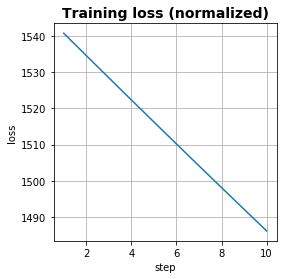

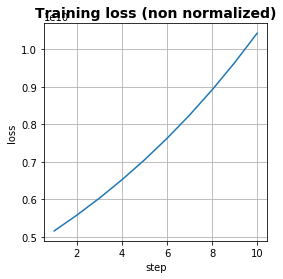

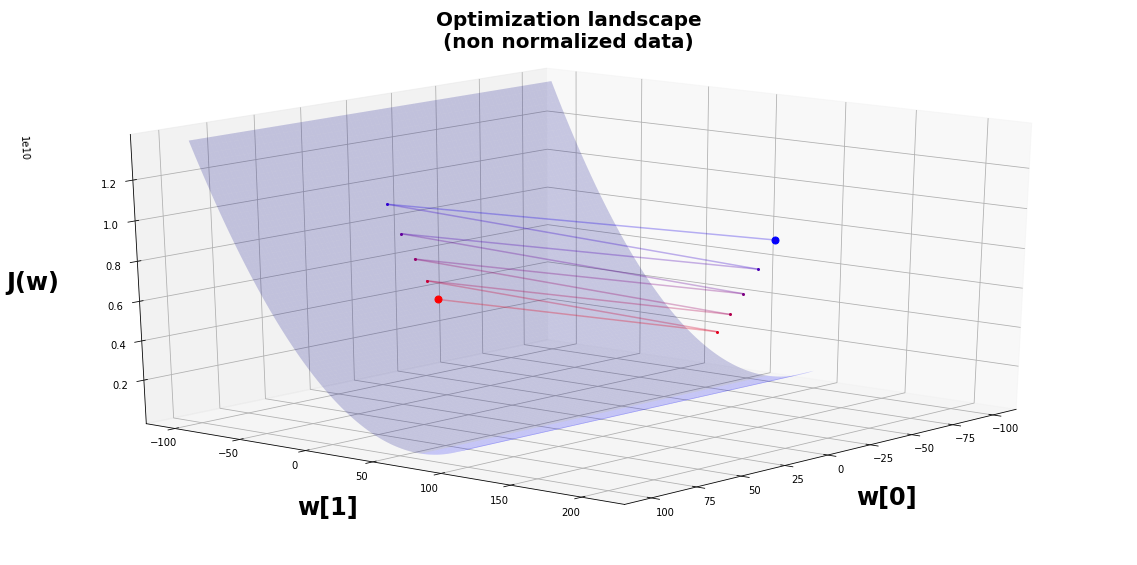

In [137]:
try:   
    simple_step_plot([cost_history_norm],
                     "loss",
                     'Training loss (normalized)')




    simple_step_plot([cost_history],
                     "loss",
                     'Training loss (non normalized)')



    plot_cost_function_curve(train_X_1_non_norm,
                             train_y,
                             compute_cost,
                             title="Optimization landscape\n(non normalized data)",
                             weights_list=weights_history,
                             cost_list=cost_history,
                             range_points=(100, 100))
except (NotImplementedError, NameError):
    print("Falta fazer!")

### Mais otimização!

Há muitos outros algoritmos de otimização construídos em cima da ideia de gradiente descendente. Um bom resumo de alguns desses algoritimos pode ser encontrado [aqui](http://ruder.io/optimizing-gradient-descent/).